In [1]:
# Librerias para manipulacion de Data y Gráficas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Preparación de datos y configuración de pipeline para Machine Learning con scikit-learn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

#models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#for regression
from sklearn.metrics import r2_score

In [4]:
data = pd.read_csv('/content/part-00000-tid-1906863738748800288-d6dbb10a-e27c-4b5d-9261-27f7bab43a35-366386-1-c000.csv')

In [5]:
import pandas as pd
data['anio_mes'] = pd.to_datetime(data['anio_mes'])

In [6]:
data.isnull().sum()

,0
anio_mes,0
semana_anio,0
Tur,0
planta_id,0
seccion_id,0
maq_id,0
Tipo_TEJ,0
Tecnologia,6
Pas,0
C,0


In [7]:
data.head()

,anio_mes,semana_anio,Tur,planta_id,seccion_id,maq_id,Tipo_TEJ,Tecnologia,Pas,C,...,Co_Dano,Descr_Dano,Gr_Dano_Dano,Gr_Dano_Secc,Und_1a,Und_2a,Tipo_2a,Rechazo_comp,rechazo_flag,Reprogramado
0,2025-03-01,10,1,1,7,394,Liso,GOAL,55.0,Nac,...,190.0,Segunda no digitada PLC,TEJ,TEJ,109.0,3.0,2a Rep,NaN,0.0,NaN
1,2025-03-01,10,3,1,7,394,Liso,GOAL,55.0,Nac,...,NaN,NaN,NaN,NaN,70.0,0.0,NaN,2.0,1.0,NaN
2,2025-03-01,10,1,1,7,394,Liso,GOAL,55.0,Nac,...,NaN,NaN,NaN,NaN,14.0,0.0,NaN,2.0,1.0,NaN
3,2023-11-01,47,1,1,7,288,Acanalado,SILV,56.0,Exp,...,NaN,NaN,NaN,NaN,122.0,0.0,NaN,3.0,1.0,Por Segundas
4,2024-05-01,19,1,1,7,288,Acanalado,SILV,56.0,Exp,...,NaN,NaN,NaN,NaN,20.0,0.0,NaN,3.0,1.0,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30219 entries, 0 to 30218
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   anio_mes            30219 non-null  datetime64[ns]
 1   semana_anio         30219 non-null  int64         
 2   Tur                 30219 non-null  int64         
 3   planta_id           30219 non-null  int64         
 4   seccion_id          30219 non-null  int64         
 5   maq_id              30219 non-null  int64         
 6   Tipo_TEJ            30219 non-null  object        
 7   Tecnologia          30213 non-null  object        
 8   Pas                 30219 non-null  float64       
 9   C                   30219 non-null  object        
 10  producto_id         30219 non-null  int64         
 11  categoria_producto  30219 non-null  object        
 12  estilo_id           30218 non-null  float64       
 13  Tal                 30218 non-null  float64   

In [9]:
data.describe()

,anio_mes,semana_anio,Tur,planta_id,seccion_id,maq_id,Pas,producto_id,estilo_id,Tal,...,Tal_Fert,Col_Fert,Componentes,g_art_id,mp_id,Co_Dano,Und_1a,Und_2a,Rechazo_comp,rechazo_flag
count,30219,30219.000000,30219.000000,30219.000000,30219.000000,30219.000000,30219.000000,30219.000000,30218.000000,30218.000000,...,30218.000000,30218.000000,30218.000000,30218.000000,30218.000000,16674.000000,27100.000000,28275.000000,26689.000000,30218.000000
mean,2024-04-26 10:25:48.932790784,23.299381,2.019326,1.000066,7.239651,362.908435,54.489593,695.985043,7.268879,6.194421,...,6.518731,8807.507148,2.237507,22.187339,9.603614,206.294350,92.370812,2.922617,2.524373,0.845953
min,2023-01-01 00:00:00,1.000000,1.000000,1.000000,1.000000,4.000000,51.000000,4.000000,1.000000,0.000000,...,0.000000,233.000000,1.000000,6.000000,1.000000,101.000000,1.000000,0.000000,0.000000,0.000000
25%,2023-08-01 00:00:00,10.000000,1.000000,1.000000,7.000000,242.000000,52.000000,45.000000,3.000000,6.000000,...,6.000000,961.000000,1.000000,16.000000,9.000000,107.000000,41.000000,0.000000,2.000000,1.000000
50%,2024-04-01 00:00:00,21.000000,2.000000,1.000000,7.000000,327.000000,55.000000,181.000000,10.000000,7.000000,...,7.000000,9900.000000,1.000000,26.000000,9.000000,111.000000,84.000000,1.000000,2.000000,1.000000
75%,2025-02-01 00:00:00,36.000000,3.000000,1.000000,7.000000,456.000000,55.000000,1333.000000,10.000000,7.000000,...,7.000000,9909.000000,3.000000,26.000000,12.000000,190.000000,130.000000,3.000000,2.000000,1.000000
max,2025-11-01 00:00:00,52.000000,20.000000,2.000000,13.000000,772.000000,99.000000,2295.000000,16.000000,82.000000,...,82.000000,49753.000000,6.000000,38.000000,12.000000,2122.000000,527.000000,360.000000,10.000000,1.000000
std,NaN,14.893842,1.357071,0.008135,1.364339,197.422242,2.589783,854.925778,3.819098,2.730015,...,5.707449,8404.131321,1.600423,6.521730,2.607214,374.054596,66.526045,7.456157,1.561062,0.361000


In [10]:
data['Und_1a'] = data['Und_1a'].fillna(0)
data['Und_2a'] = data['Und_2a'].fillna(0)

In [11]:
from sklearn.preprocessing import LabelEncoder

# Fill missing values in 'Tipo_2a' with 'Unknown'
data['Tipo_2a'] = data['Tipo_2a'].fillna('Unknown')

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to 'Tipo_2a'
data['Tipo_2a_encoded'] = label_encoder.fit_transform(data['Tipo_2a'])

print("Original 'Tipo_2a' unique values:", data['Tipo_2a'].unique())
print("Encoded 'Tipo_2a_encoded' unique values:", data['Tipo_2a_encoded'].unique())
print(data[['Tipo_2a', 'Tipo_2a_encoded']].head())

Original 'Tipo_2a' unique values: ['2a Rep' 'Unknown' '2a D Rep' '2a NR' '2a RP' '2a D NR']
Encoded 'Tipo_2a_encoded' unique values: [4 5 1 2 3 0]
   Tipo_2a  Tipo_2a_encoded
0   2a Rep                4
1  Unknown                5
2  Unknown                5
3  Unknown                5
4  Unknown                5


In [12]:
data = data.drop('Reprogramado', axis=1)

In [13]:
data.dropna(subset=['C','MP','mp_categoria'], inplace=True)

In [14]:
data['Rechazo_comp'] = data['Rechazo_comp'].fillna(0)

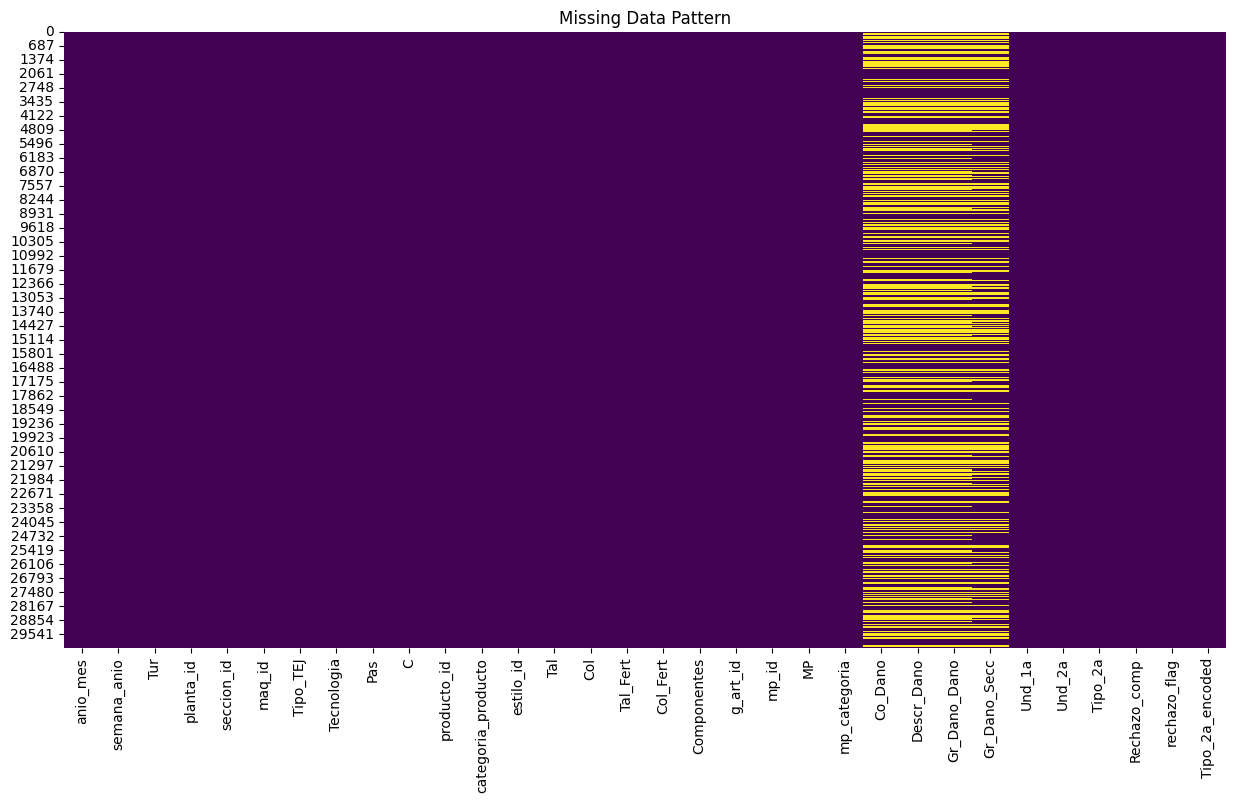

In [15]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Pattern')
plt.show()

In [16]:
numerical_features = data.select_dtypes(include=['int64', 'float64','datetime64[ns]']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", numerical_features)
print("\nCategorical Features:", categorical_features)

Numerical Features: ['anio_mes', 'semana_anio', 'Tur', 'planta_id', 'seccion_id', 'maq_id', 'Pas', 'producto_id', 'estilo_id', 'Tal', 'Col', 'Tal_Fert', 'Col_Fert', 'Componentes', 'g_art_id', 'mp_id', 'Co_Dano', 'Und_1a', 'Und_2a', 'Rechazo_comp', 'rechazo_flag', 'Tipo_2a_encoded']

Categorical Features: ['Tipo_TEJ', 'Tecnologia', 'C', 'categoria_producto', 'MP', 'mp_categoria', 'Descr_Dano', 'Gr_Dano_Dano', 'Gr_Dano_Secc', 'Tipo_2a']


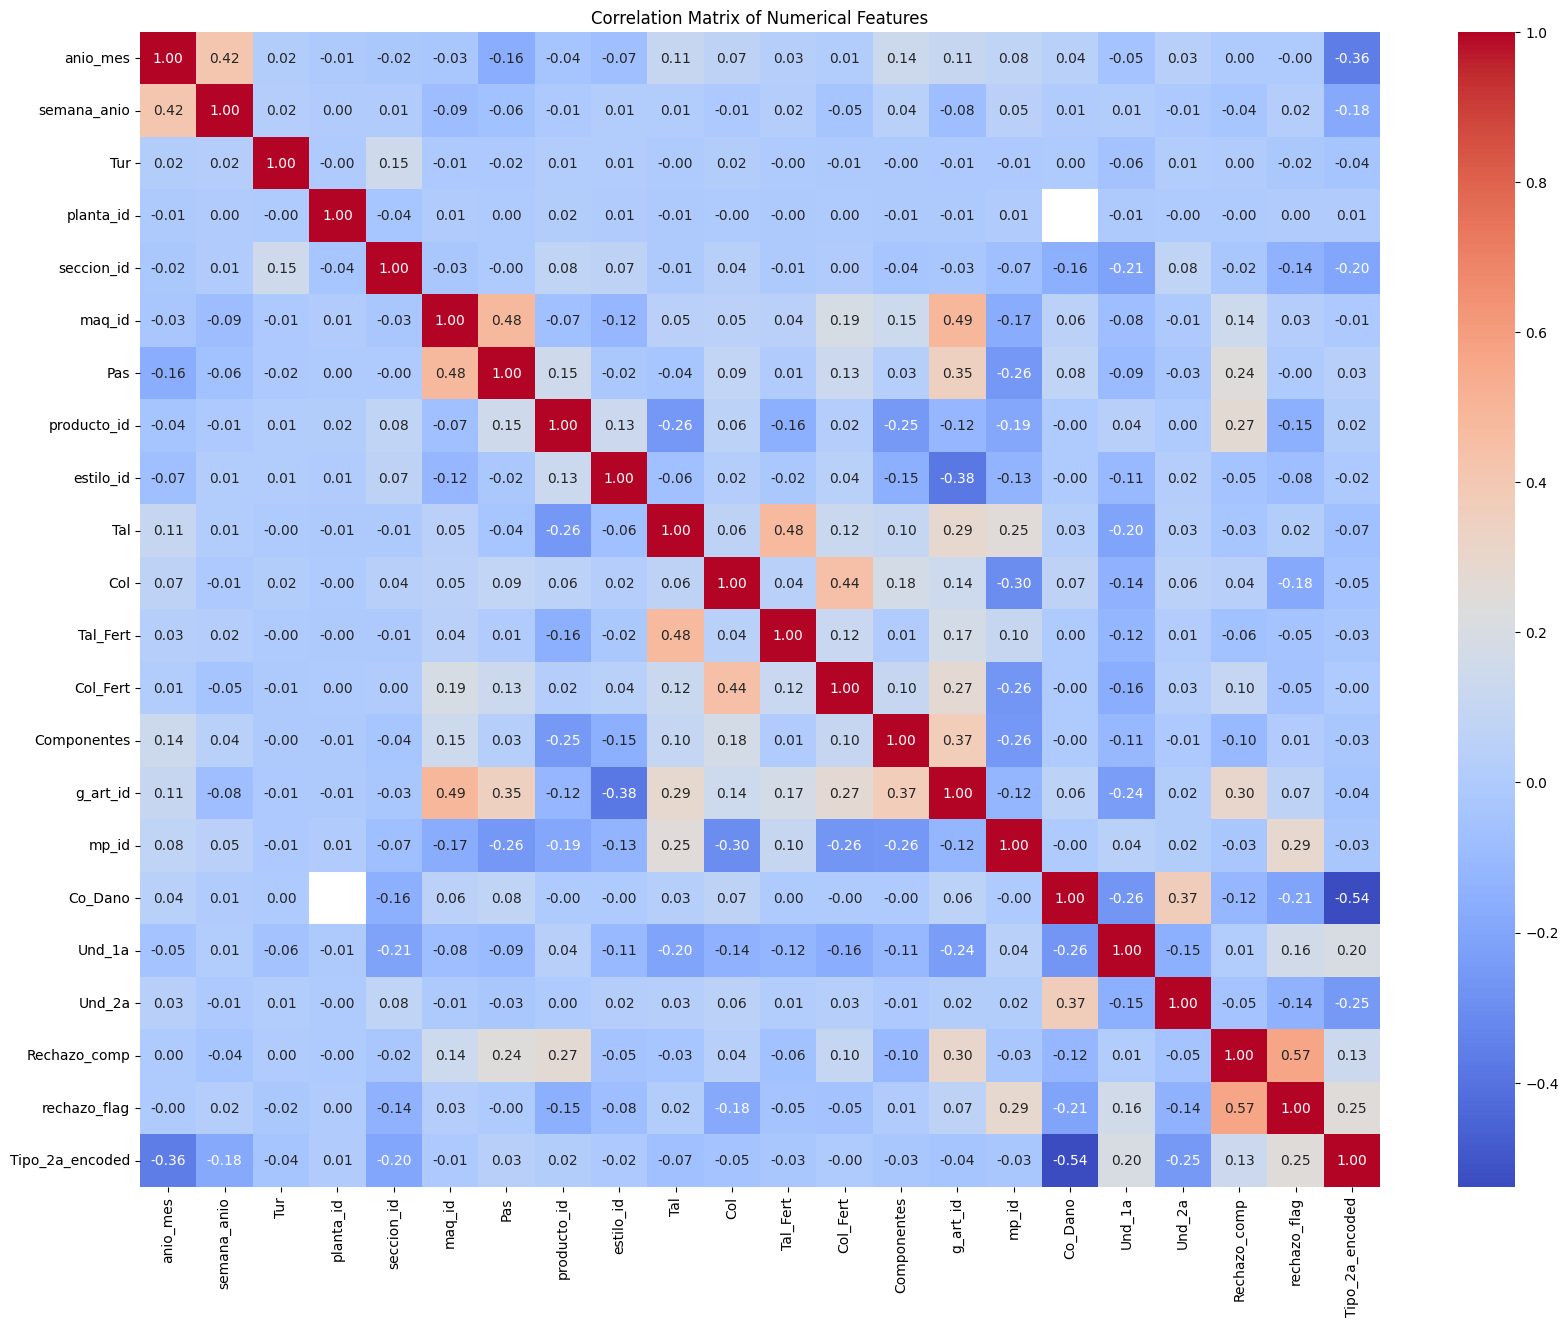

In [17]:
plt.figure(figsize=(20, 15))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

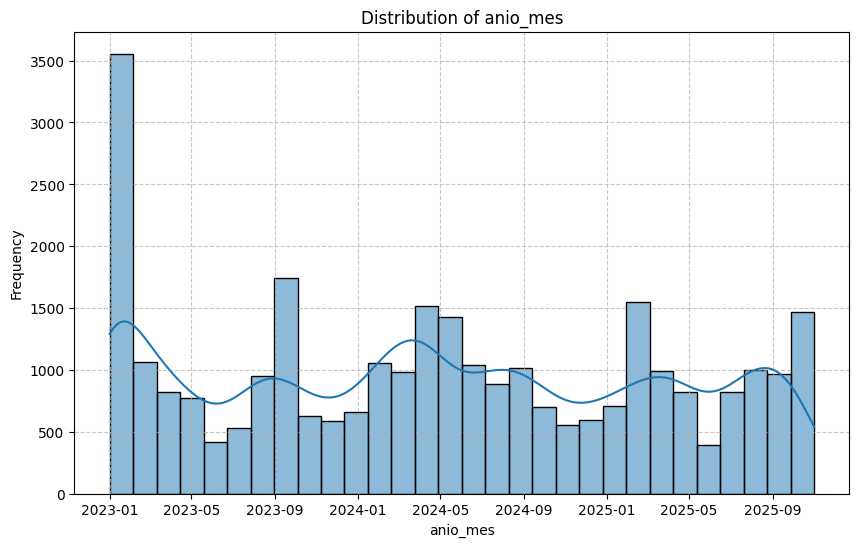

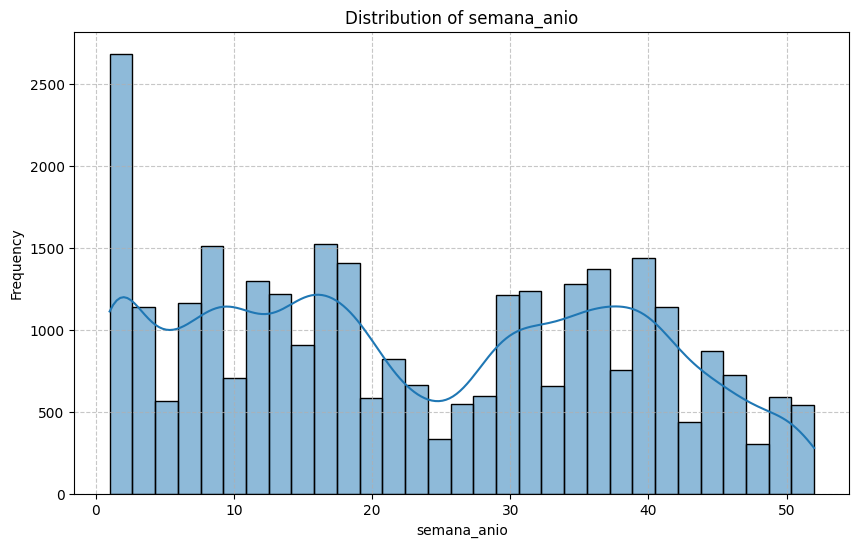

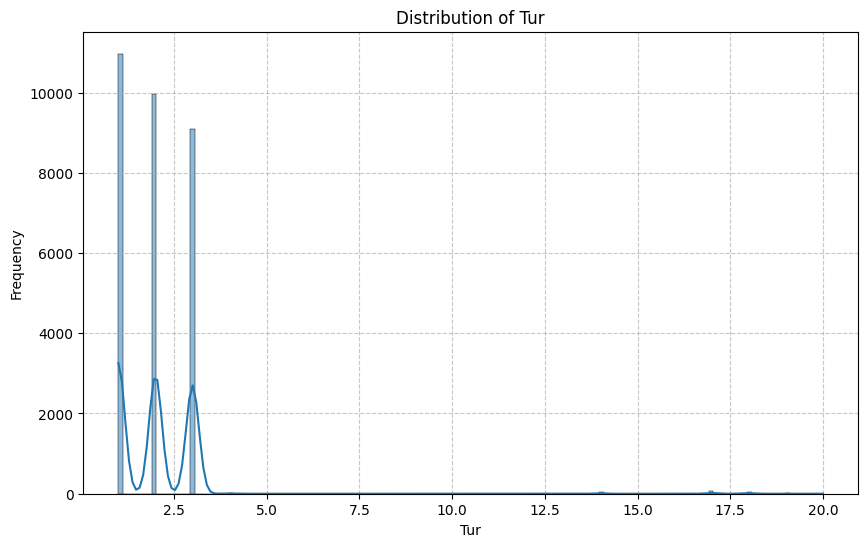

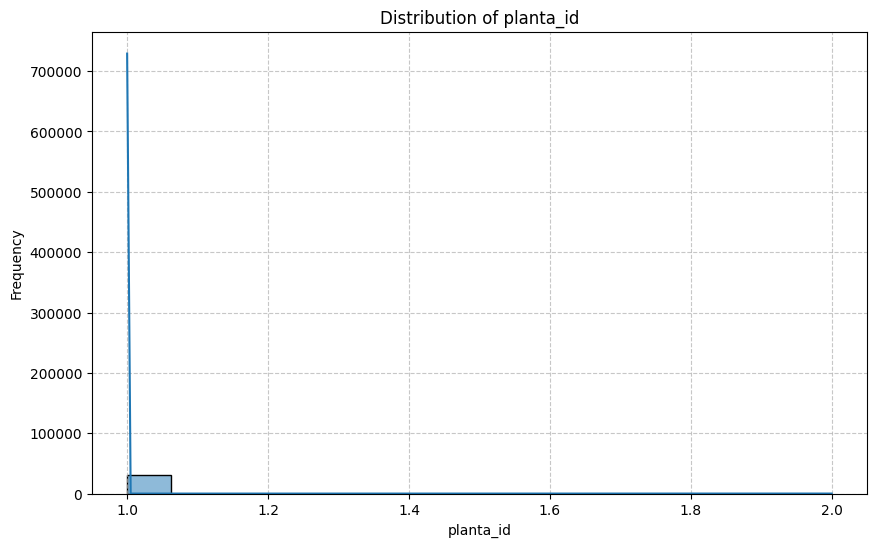

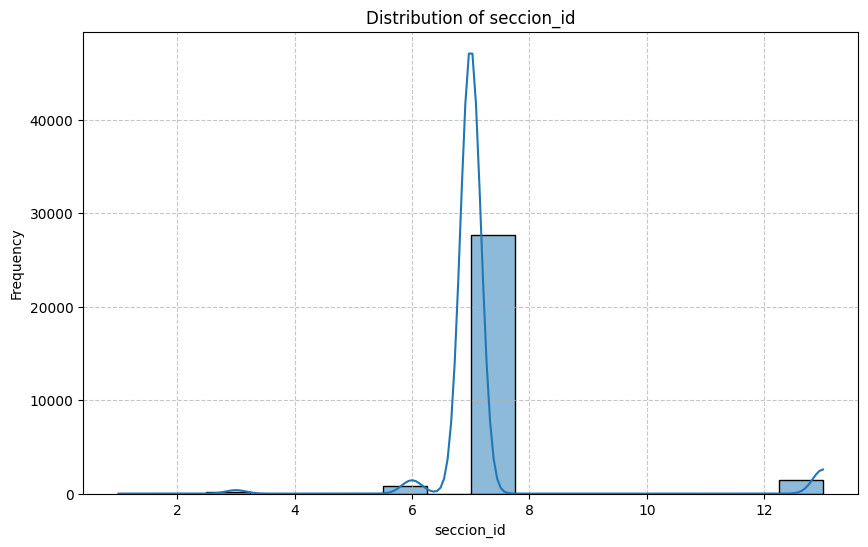

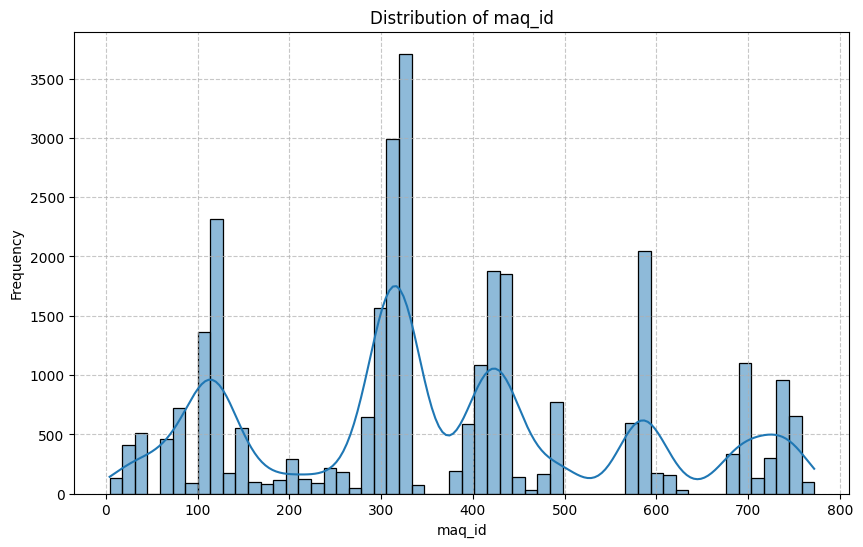

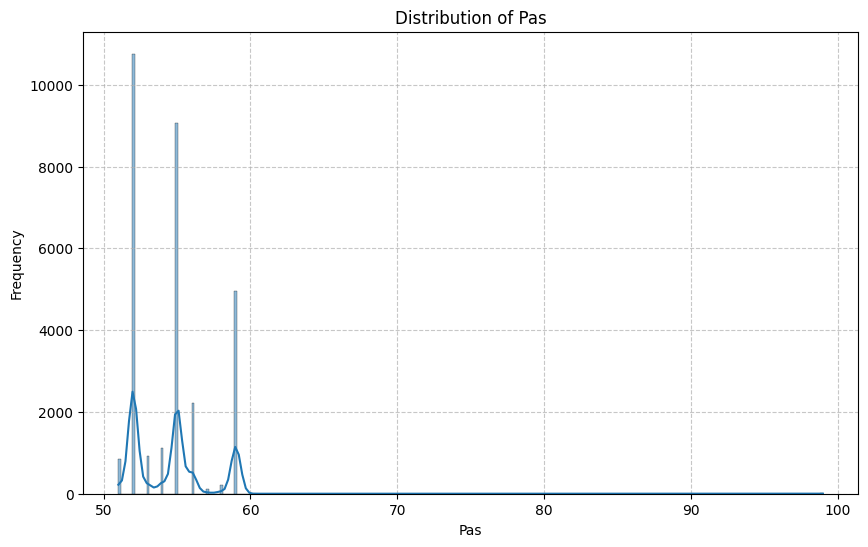

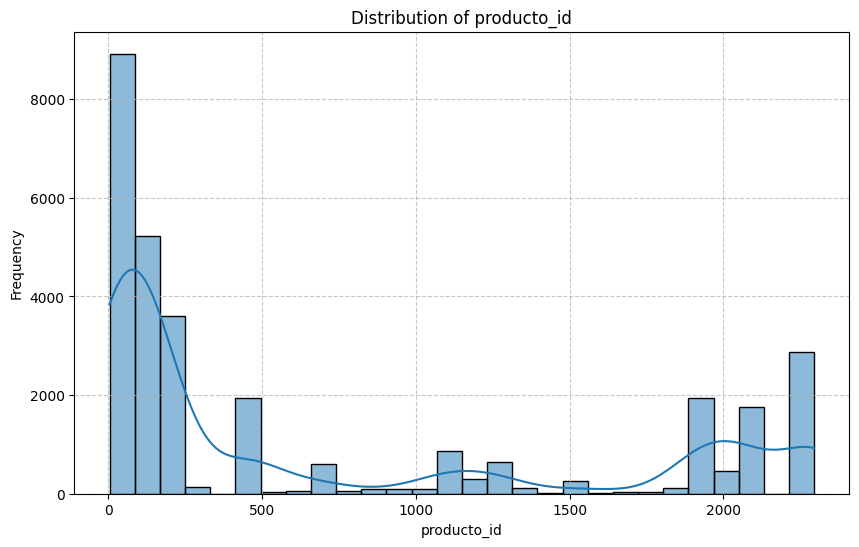

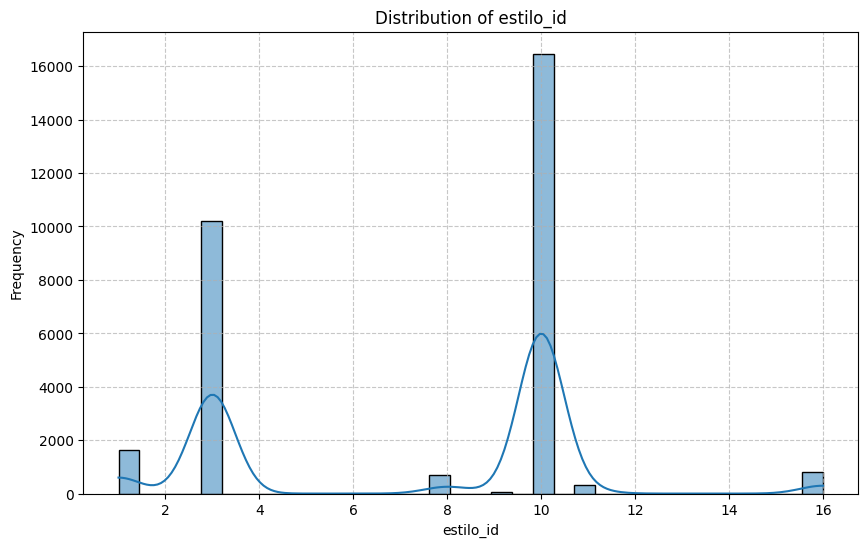

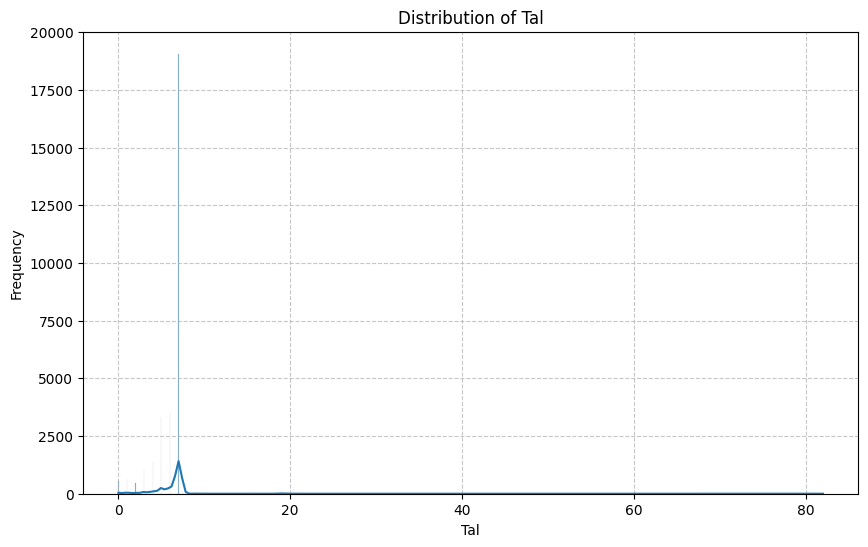

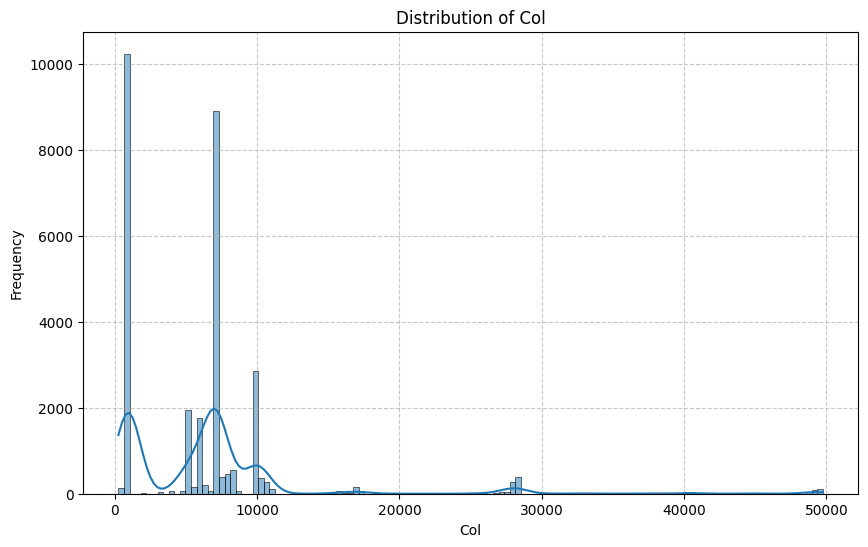

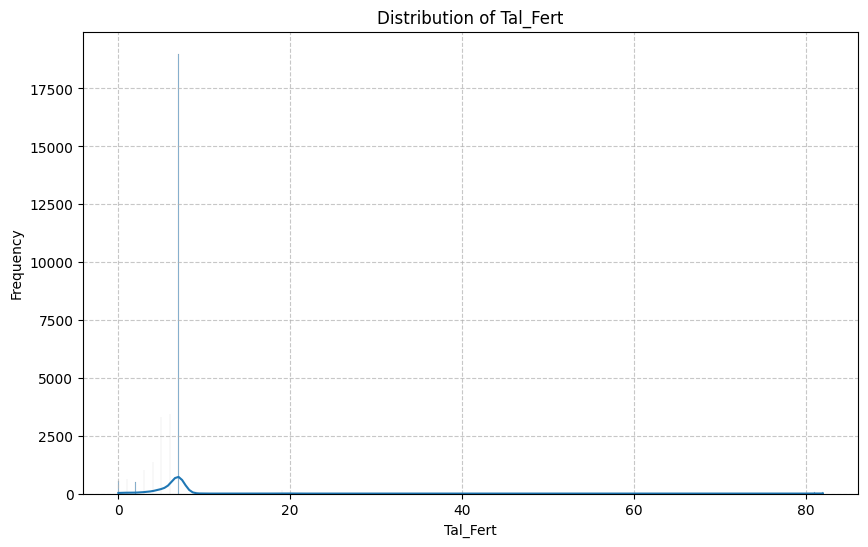

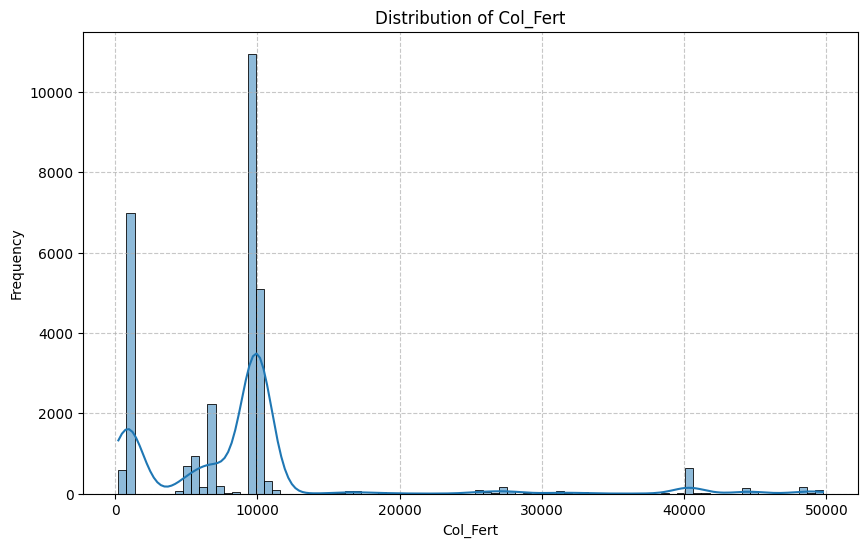

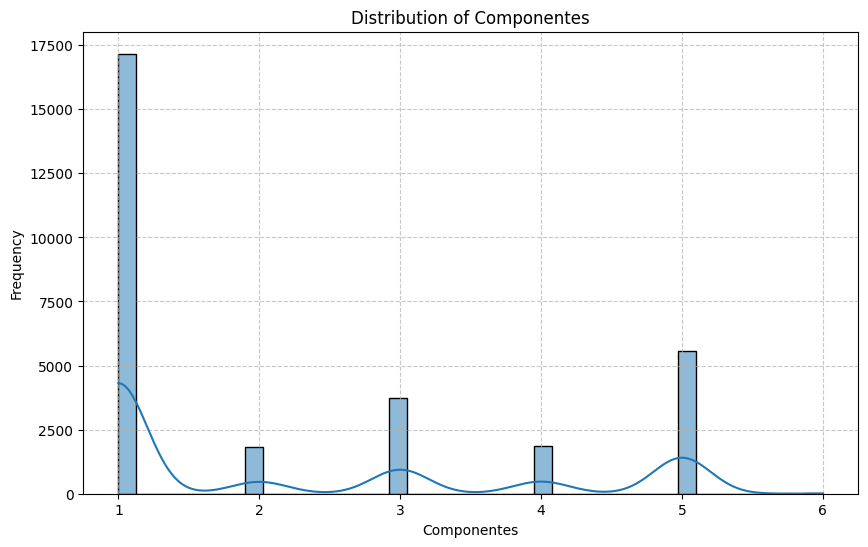

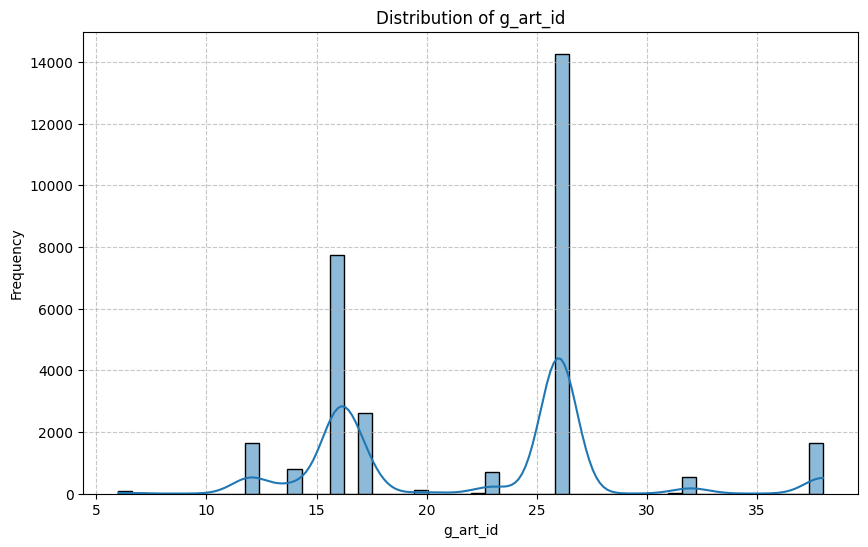

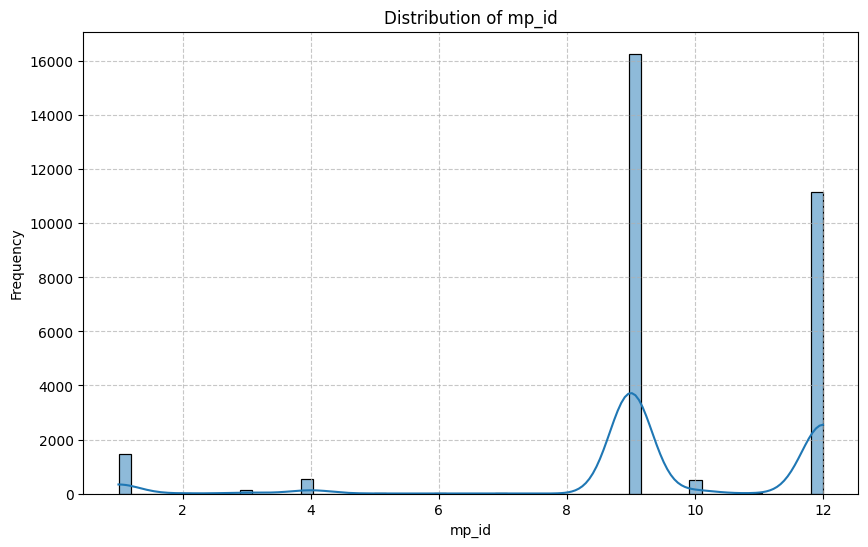

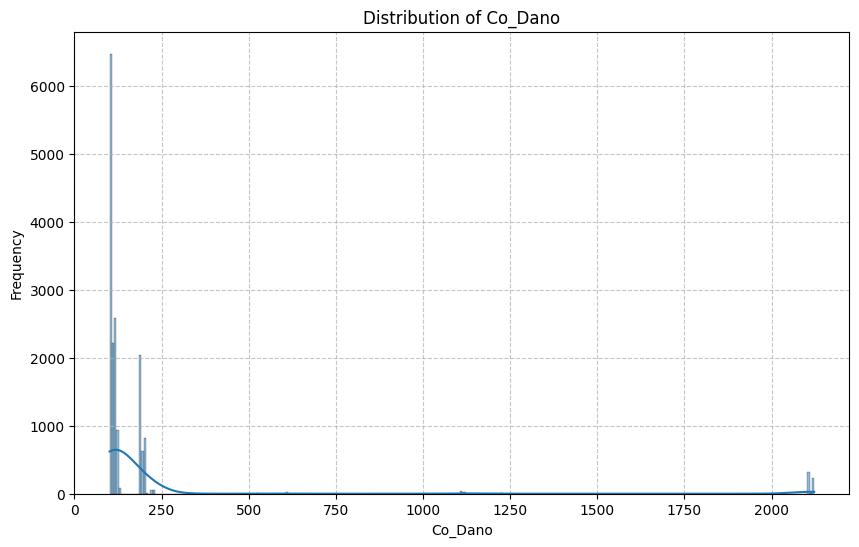

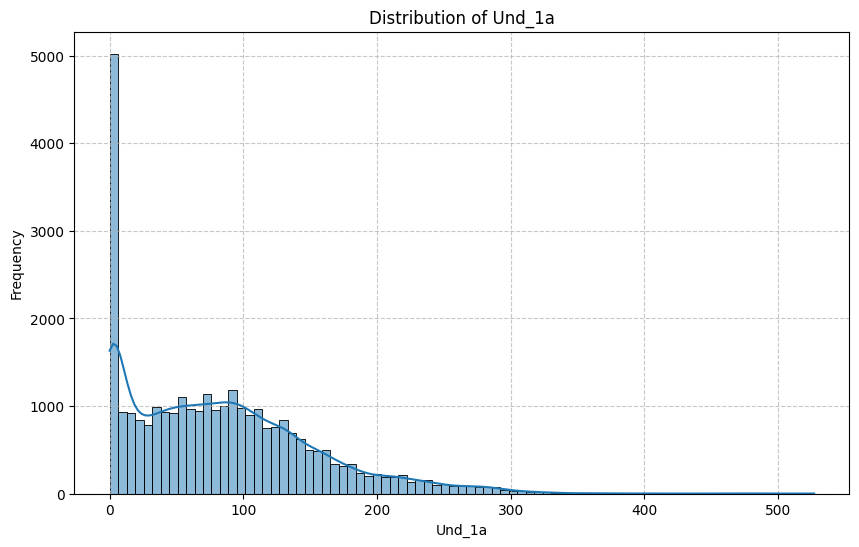

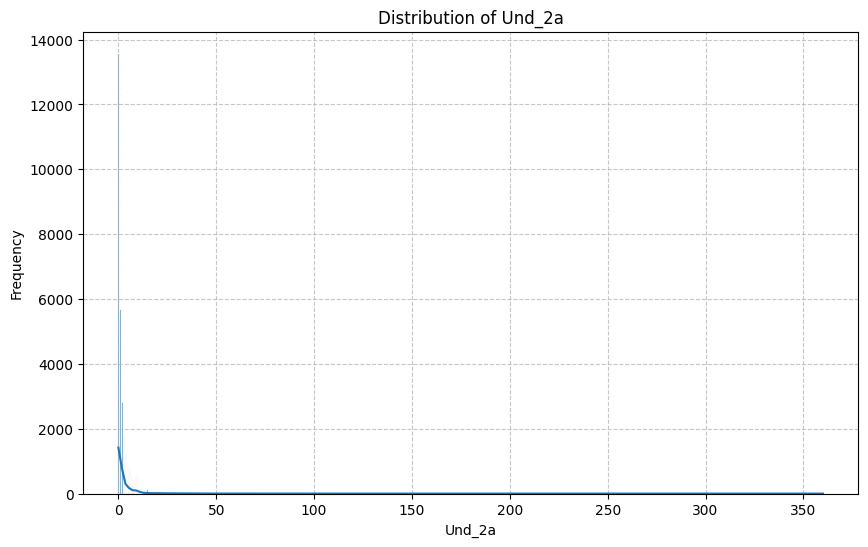

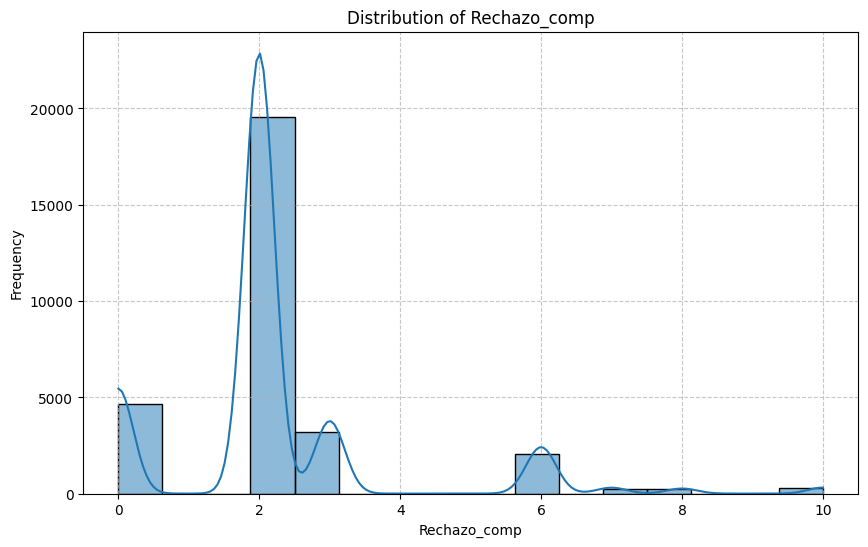

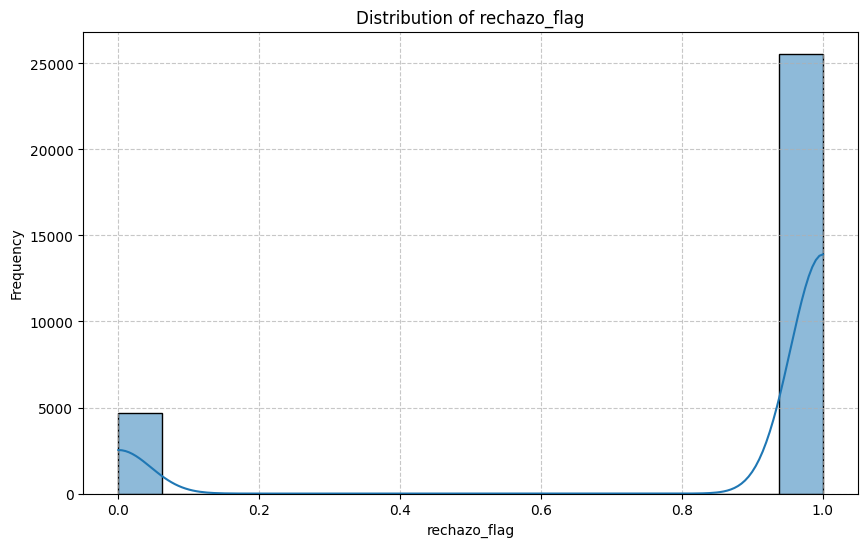

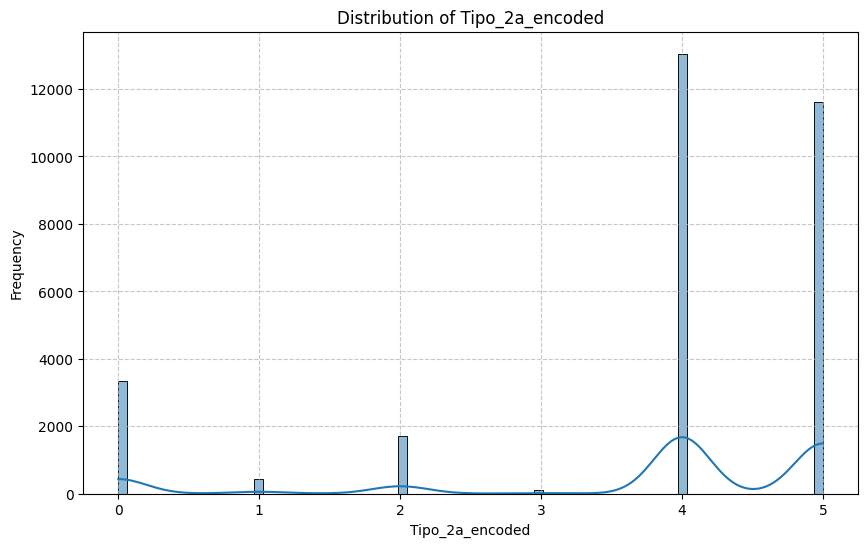

In [18]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

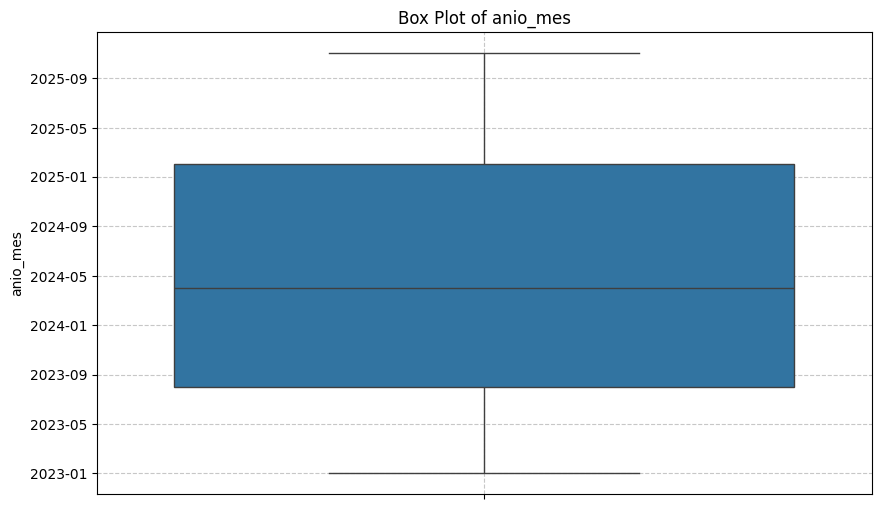

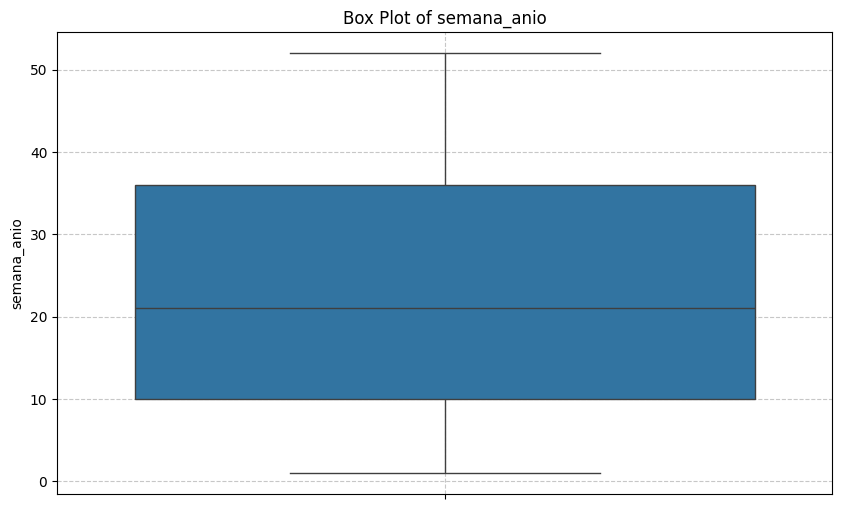

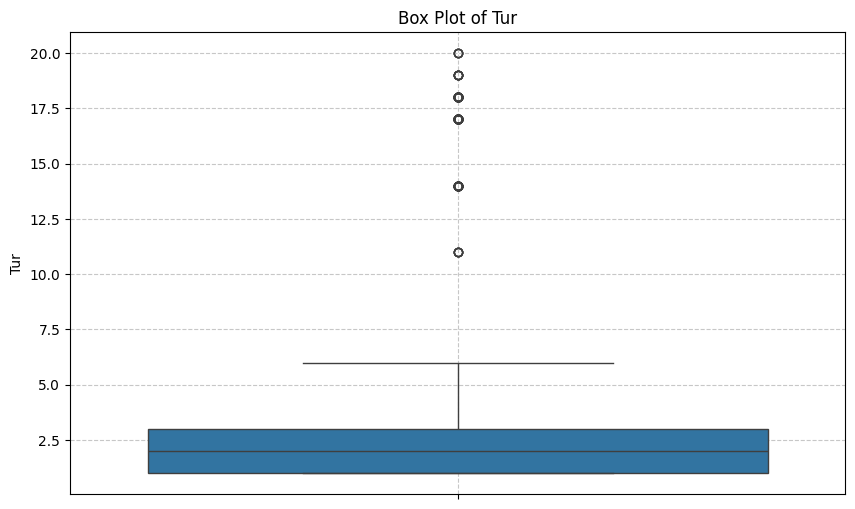

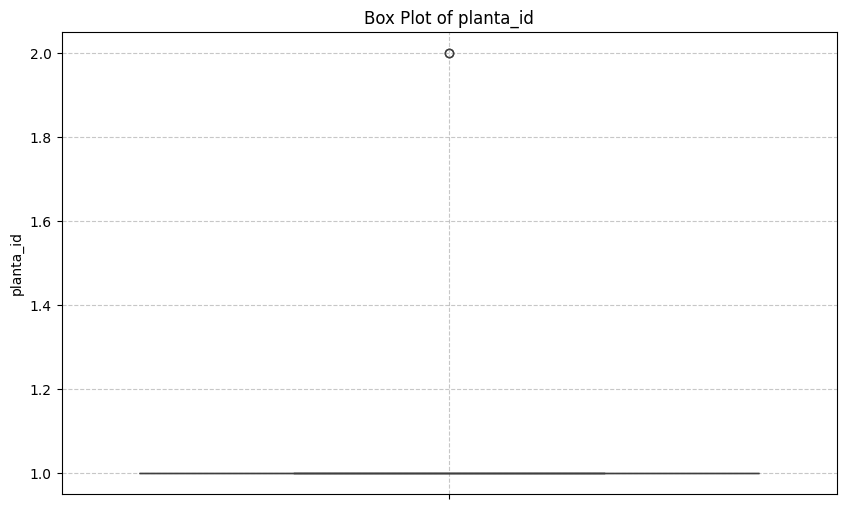

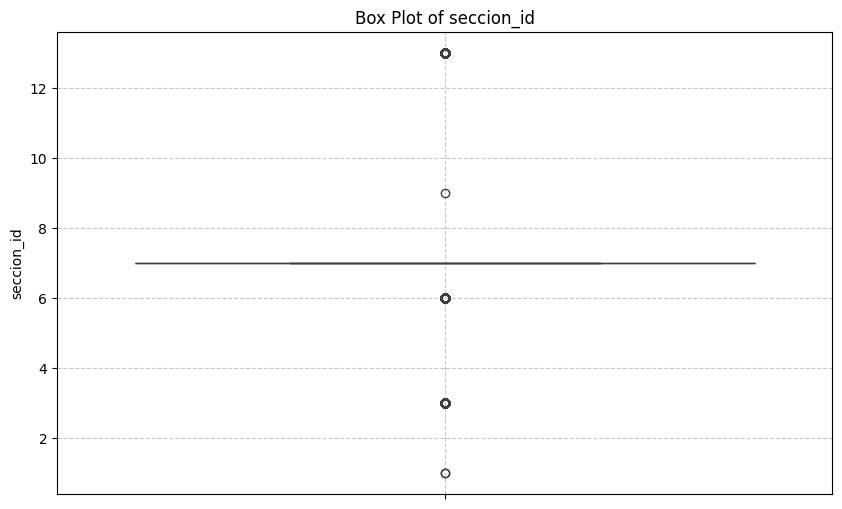

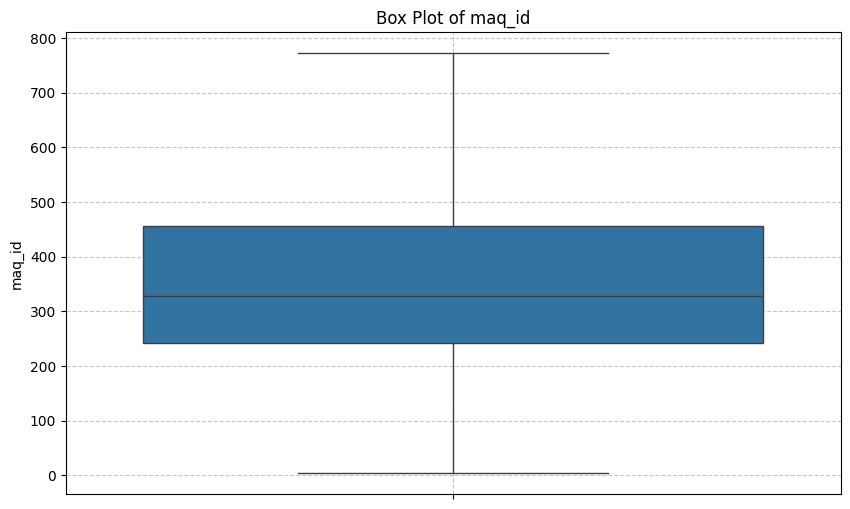

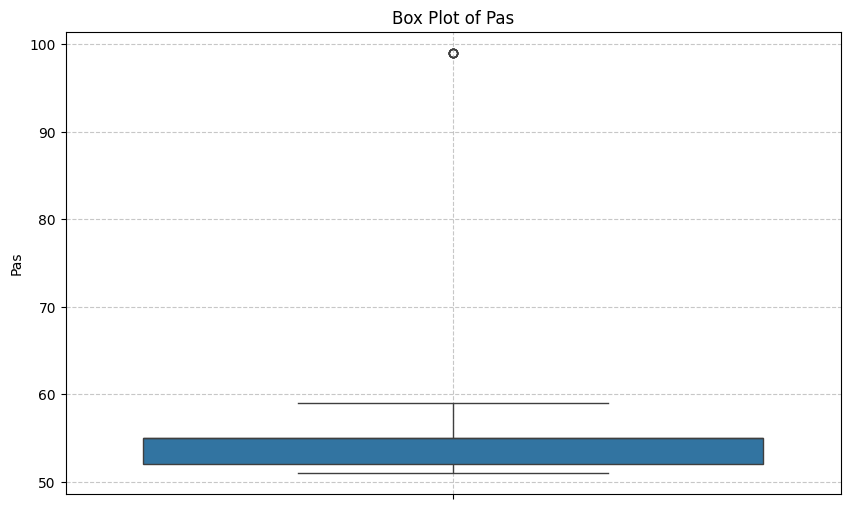

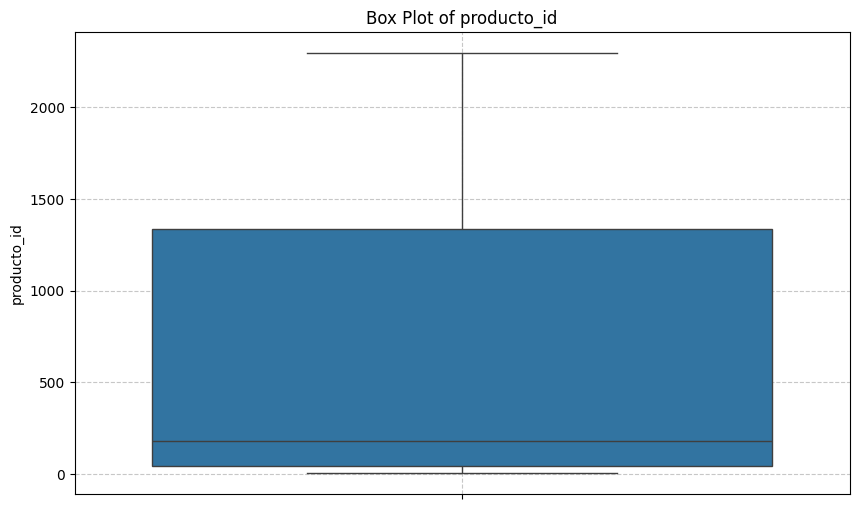

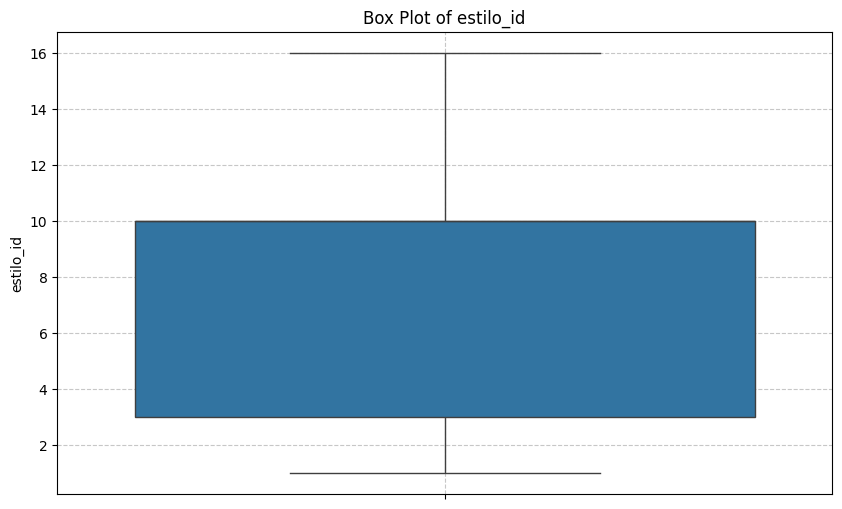

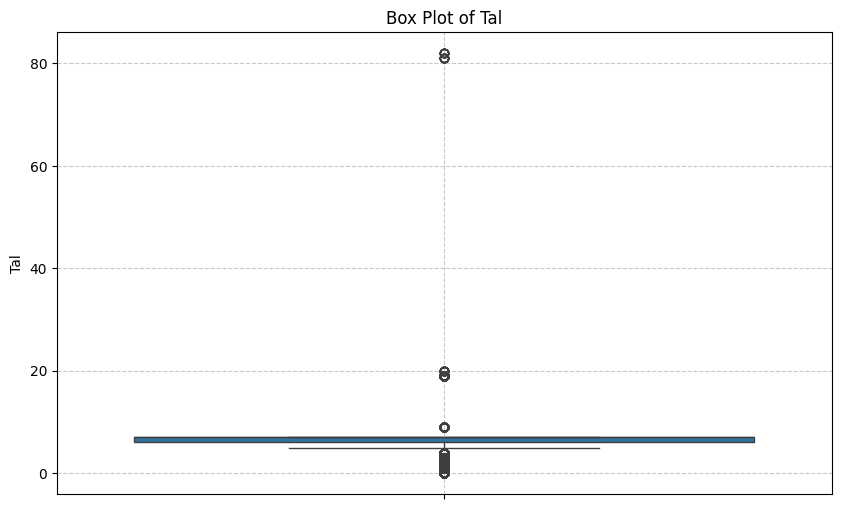

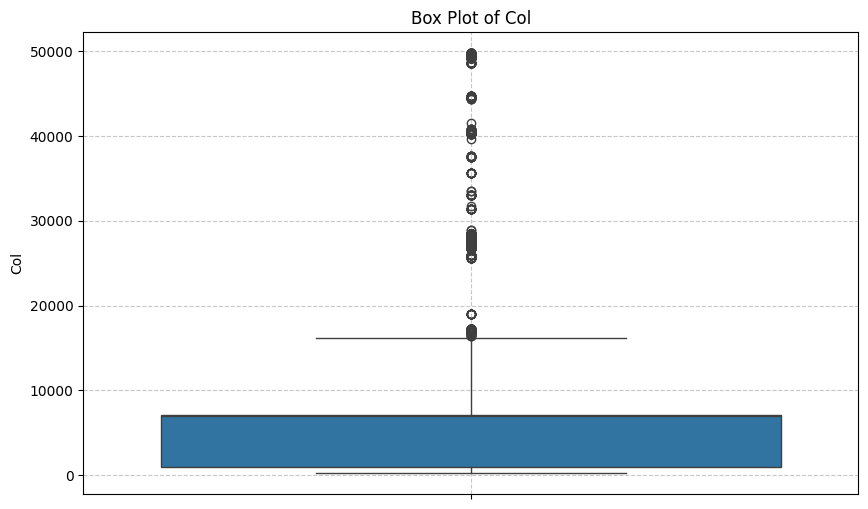

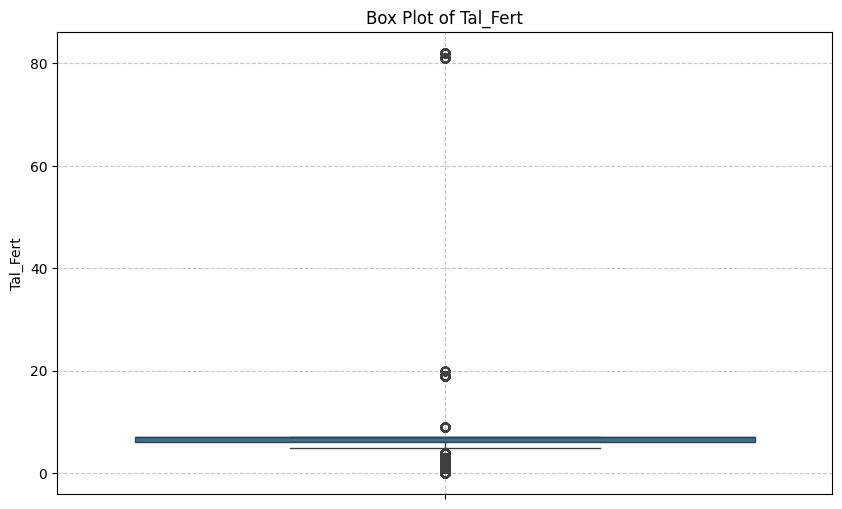

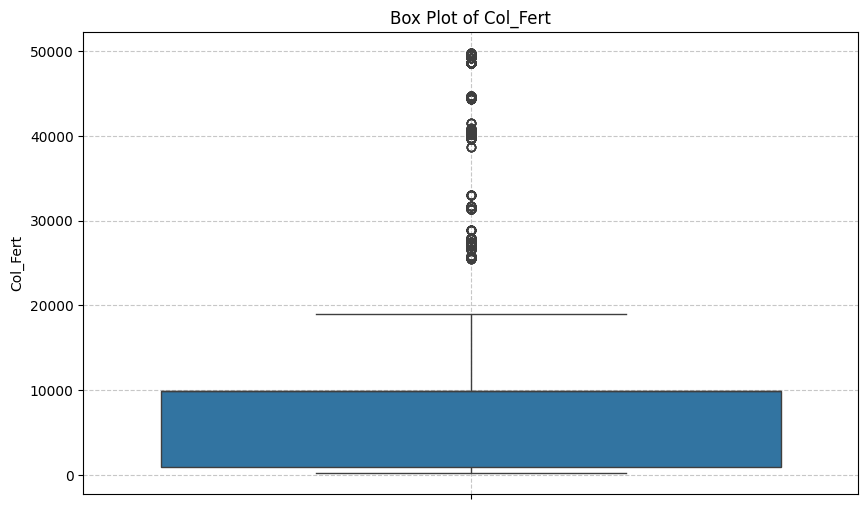

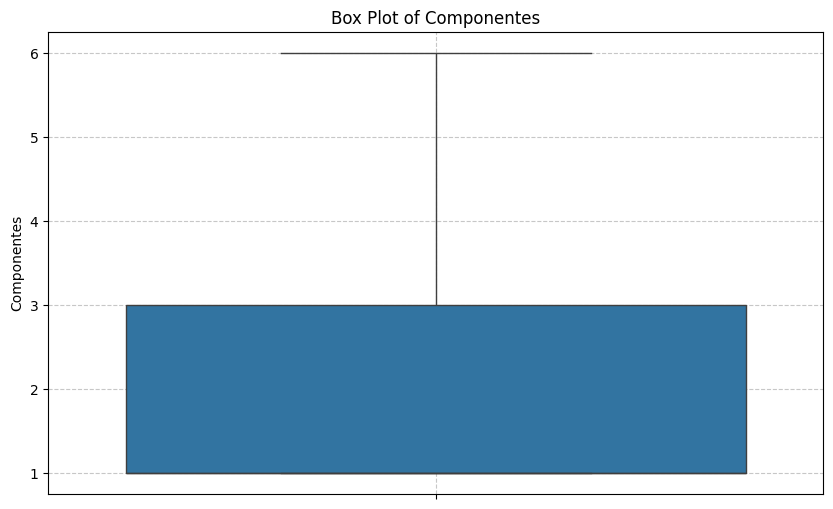

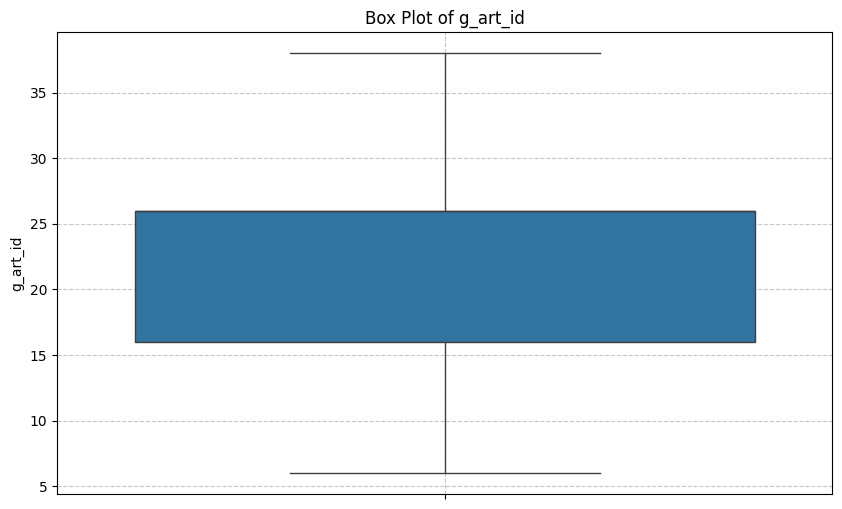

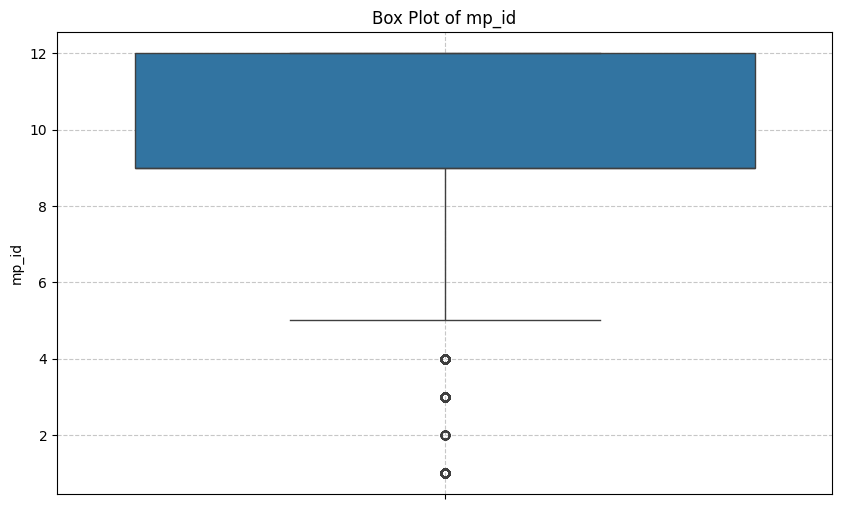

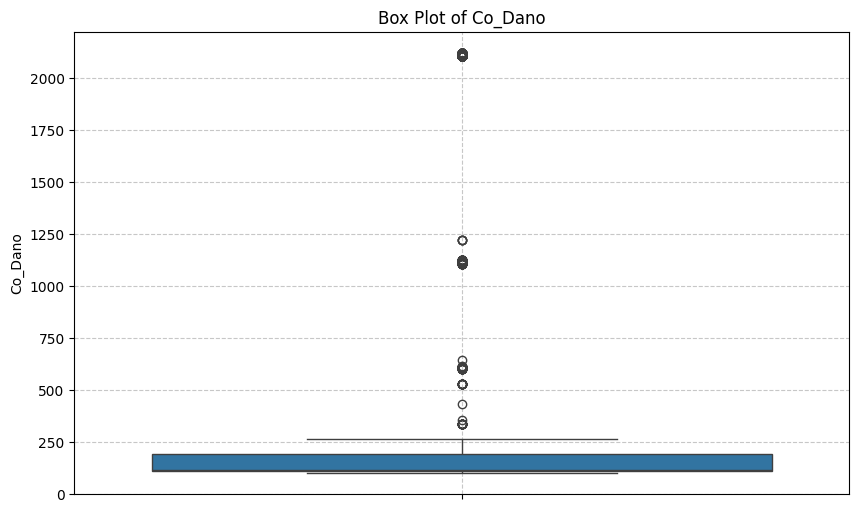

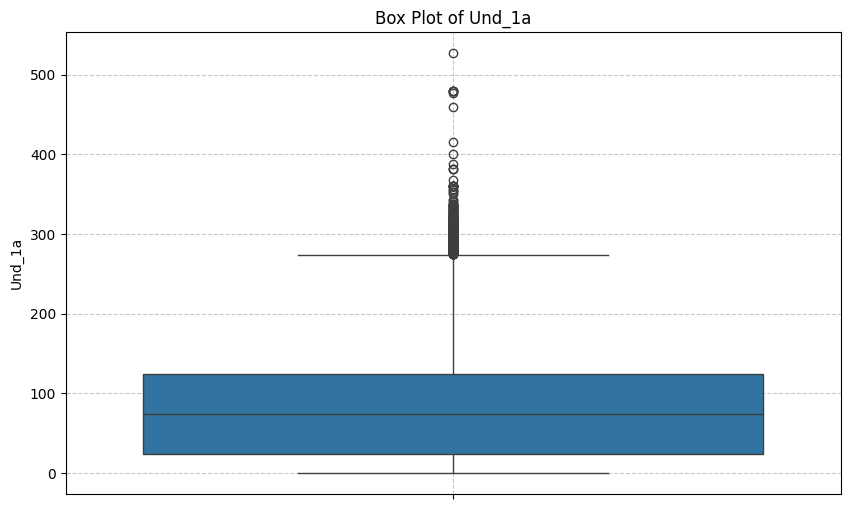

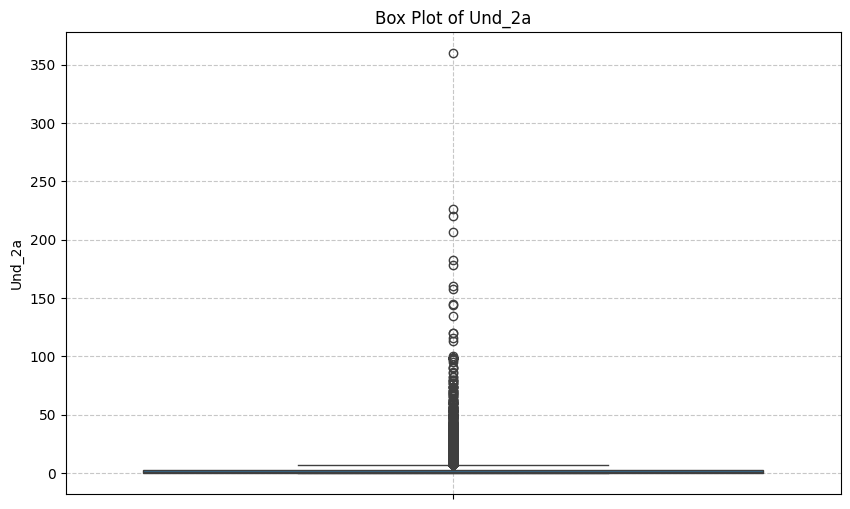

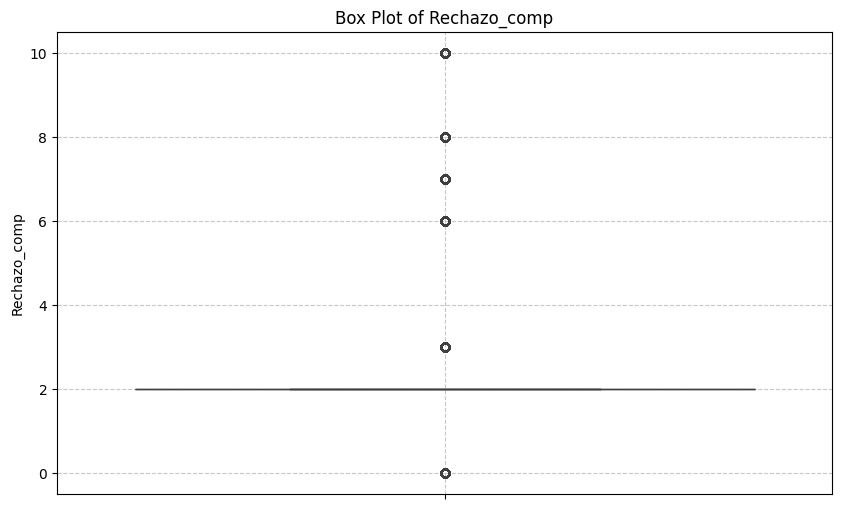

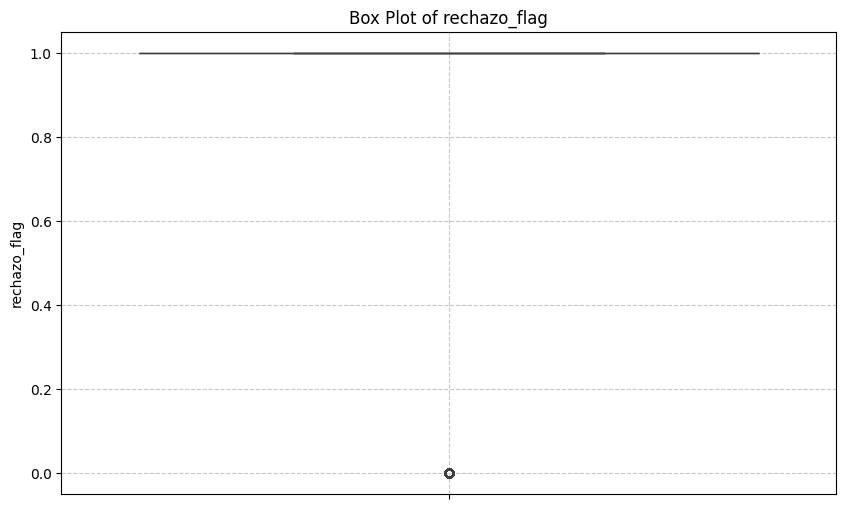

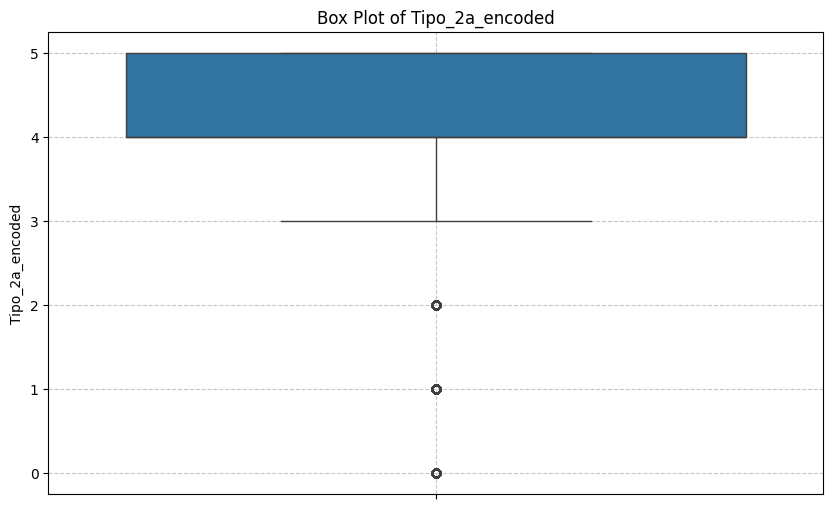

In [19]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=data[feature].dropna())
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

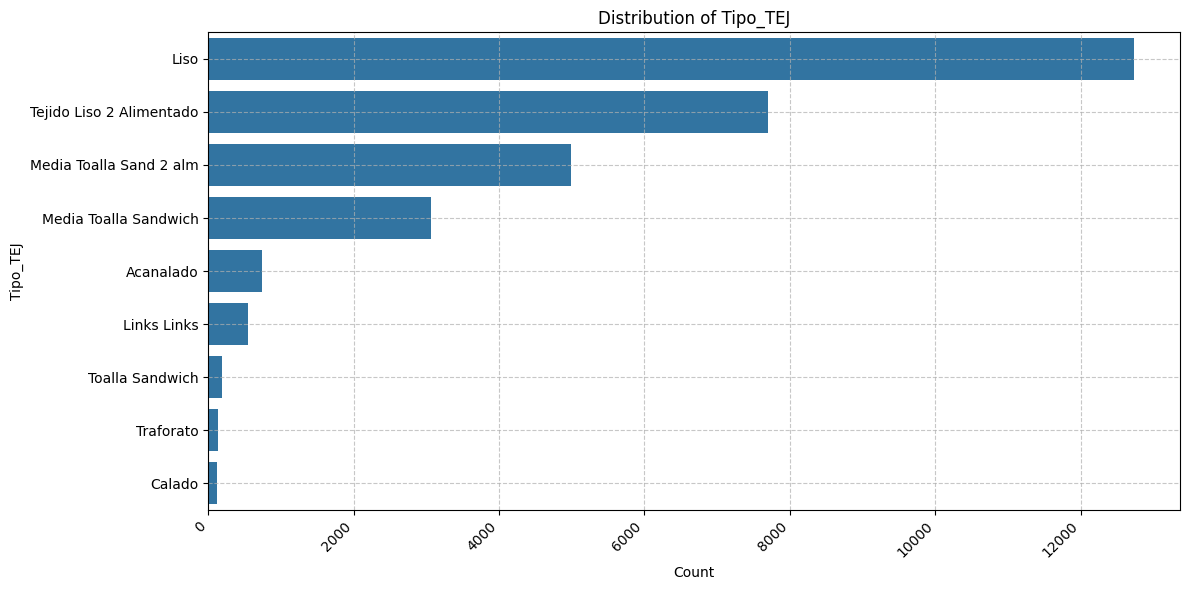

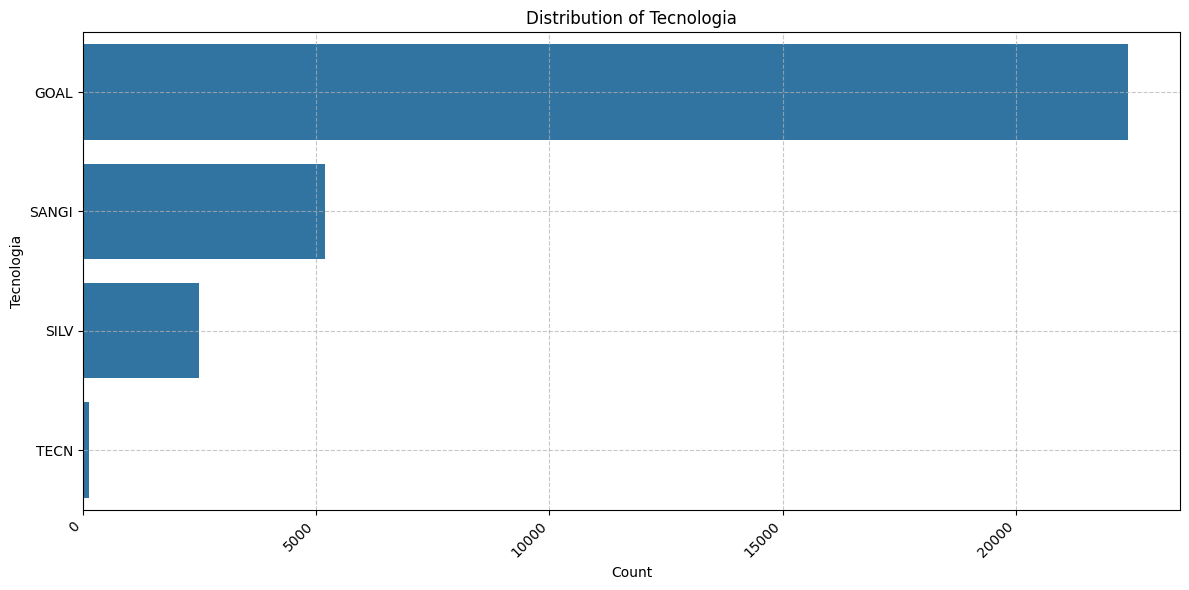

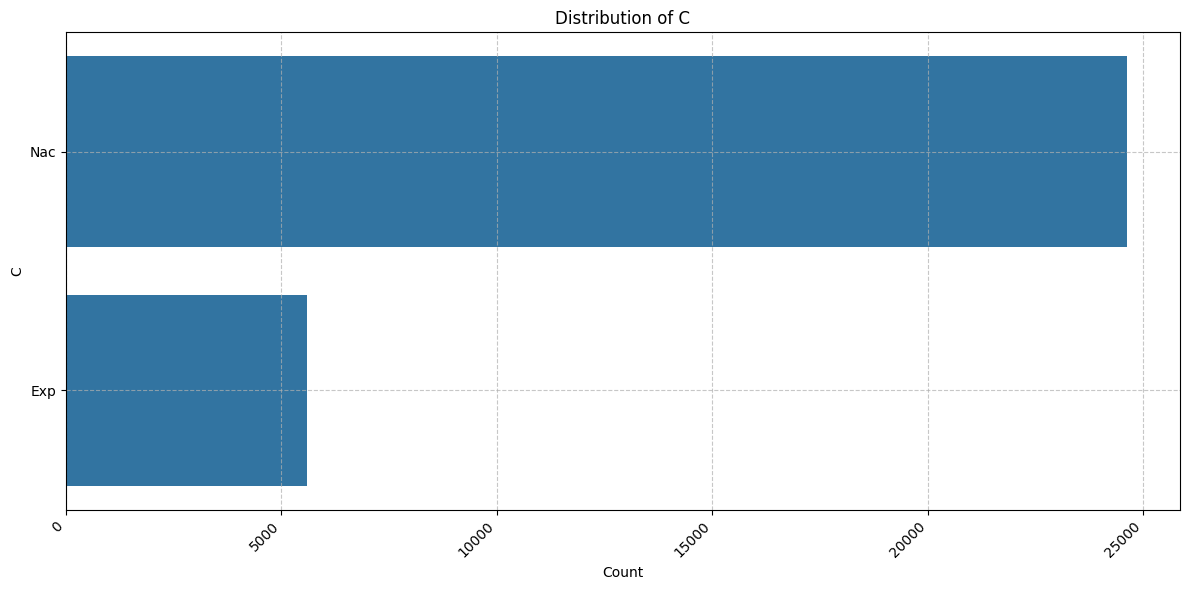

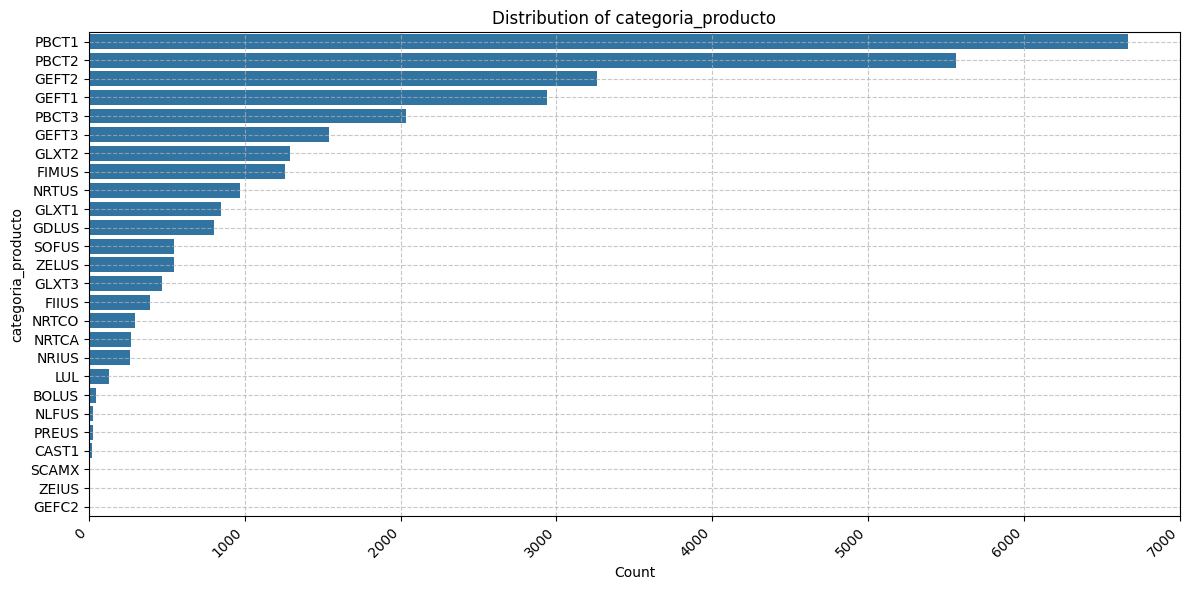

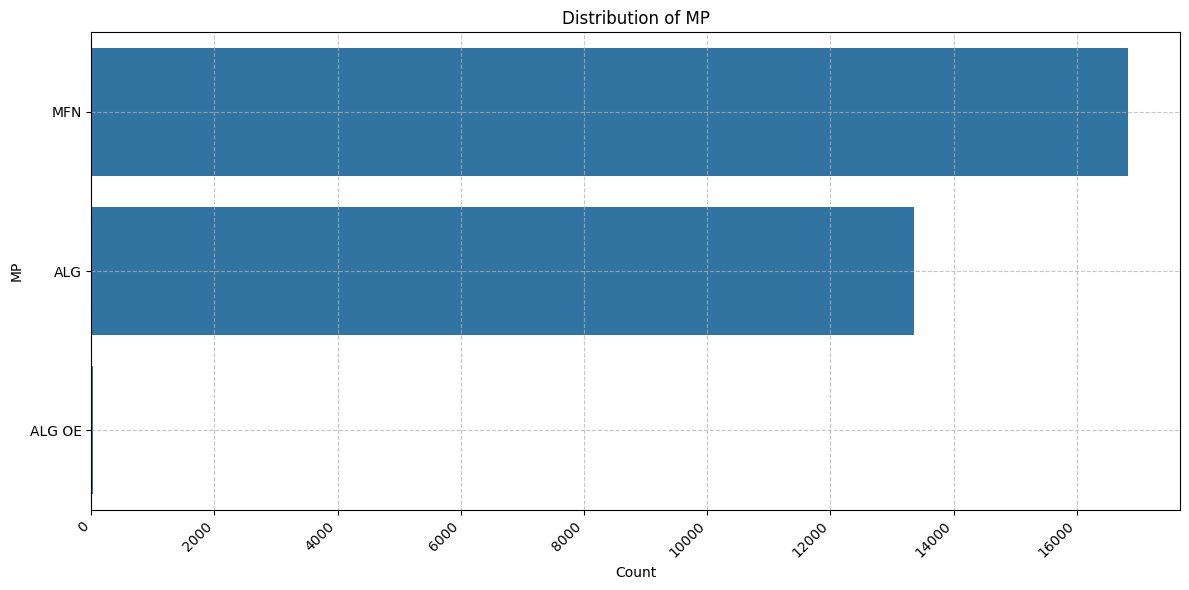

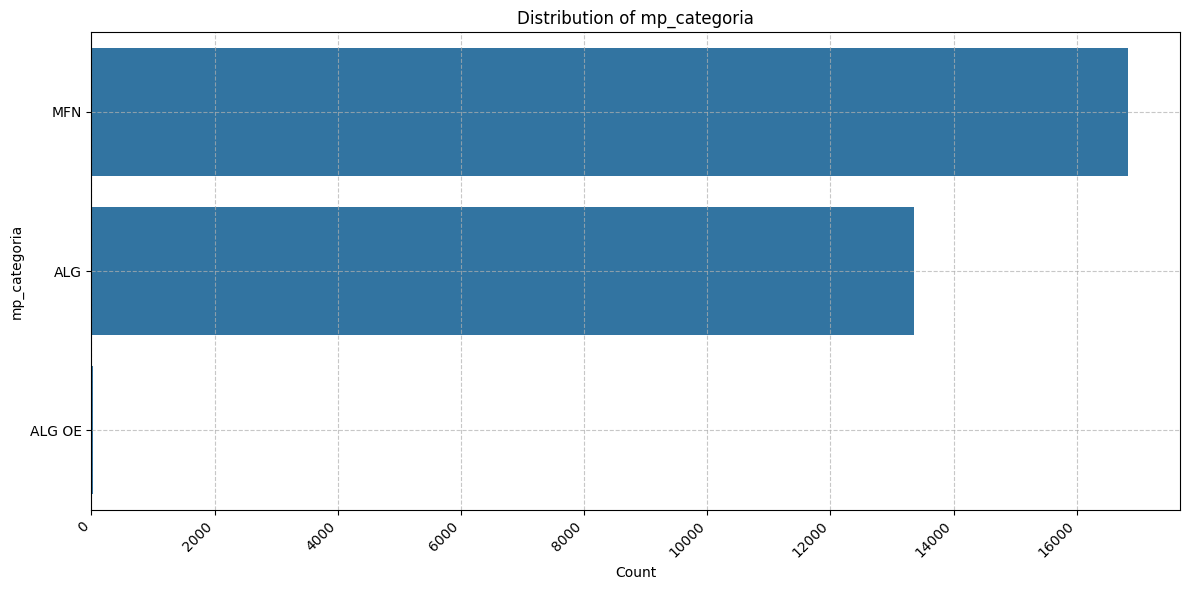

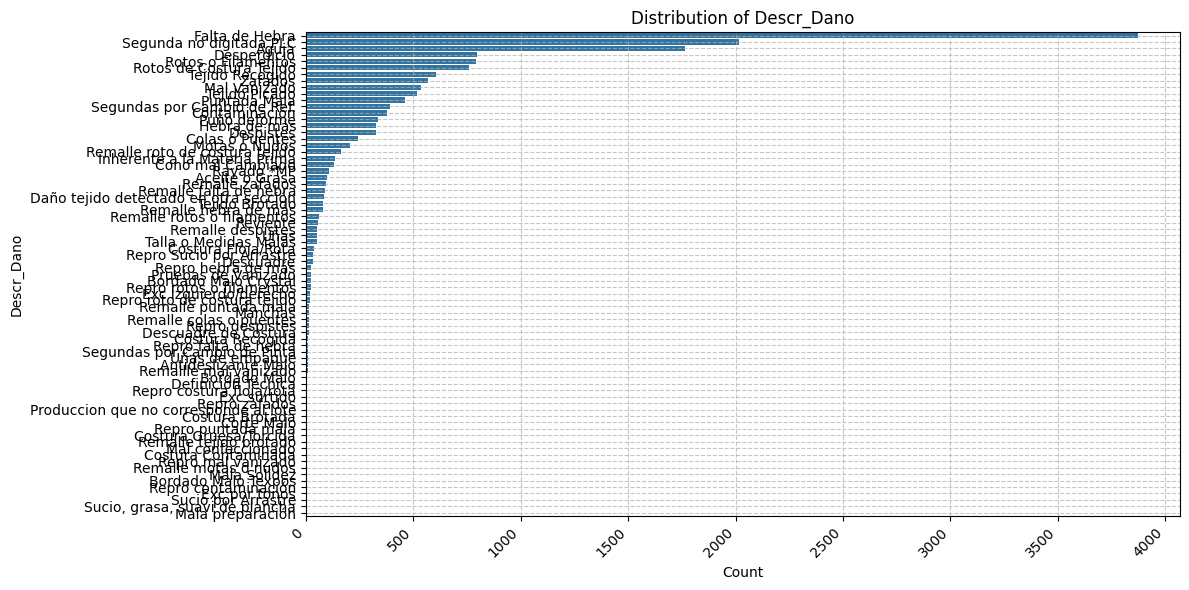

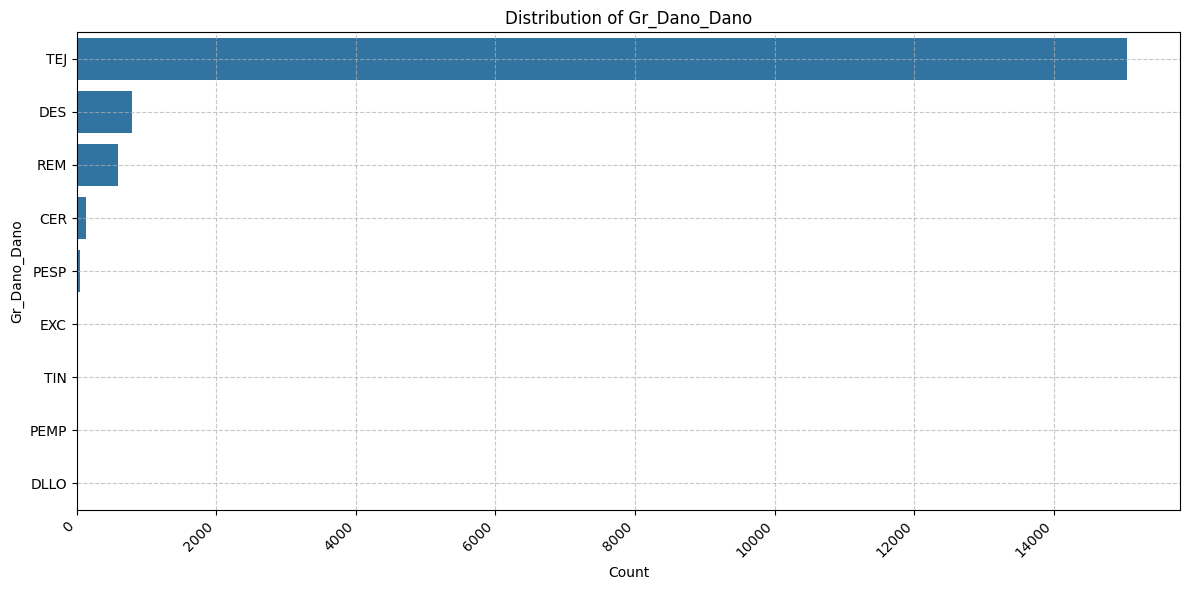

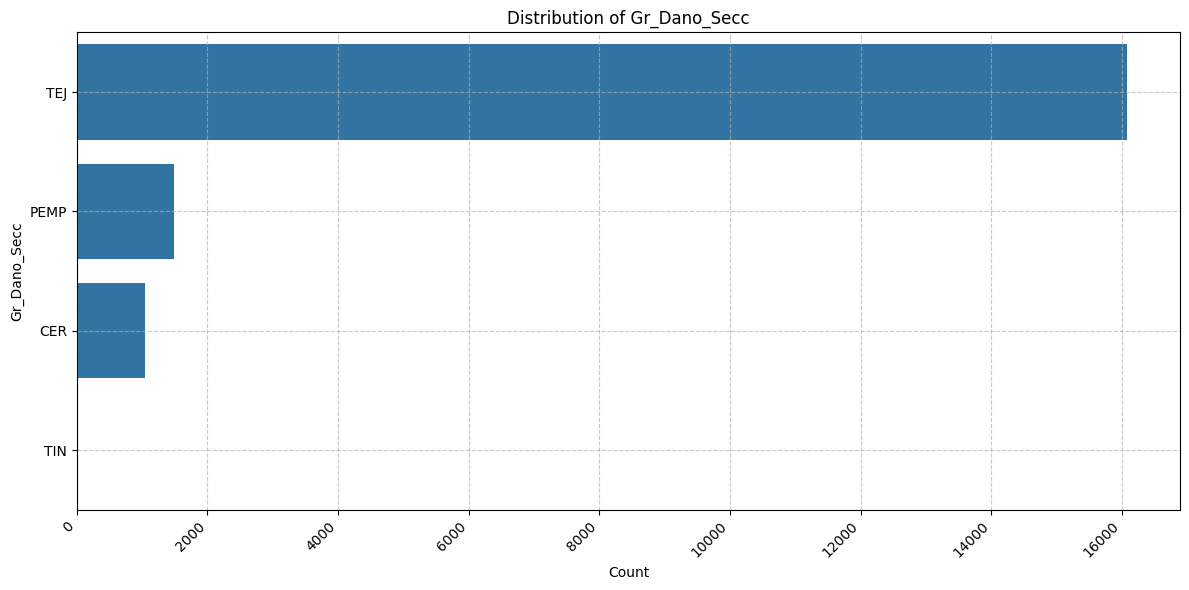

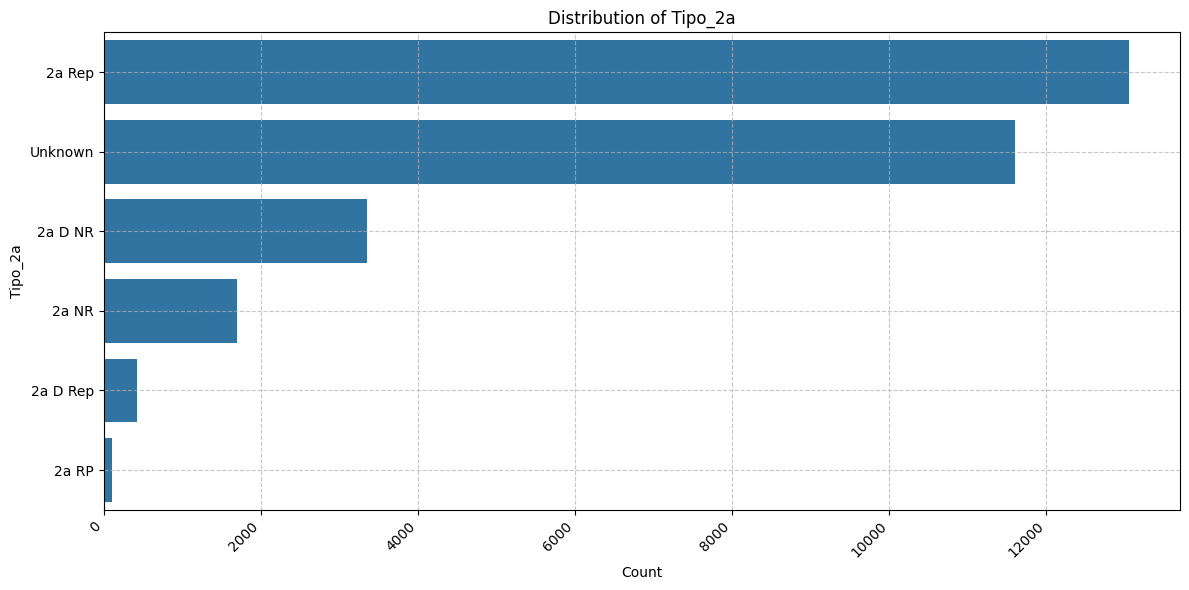

In [20]:
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=data[feature], order = data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [21]:
data['total_und'] = data['Und_1a'] + data['Und_2a']
data['Und_2a_percentage'] = data['Und_2a'] / data['total_und']
data['Und_2a_percentage'] = data['Und_2a_percentage'].fillna(0)

In [22]:
columns_to_drop = ['Co_Dano', 'Descr_Dano', 'Gr_Dano_Dano', 'Gr_Dano_Secc', 'Tipo_2a', 'anio_mes']
data = data.drop(columns=columns_to_drop)
print(f"Columns dropped: {columns_to_drop}")
print(data.columns)

Columns dropped: ['Co_Dano', 'Descr_Dano', 'Gr_Dano_Dano', 'Gr_Dano_Secc', 'Tipo_2a', 'anio_mes']
Index(['semana_anio', 'Tur', 'planta_id', 'seccion_id', 'maq_id', 'Tipo_TEJ',
       'Tecnologia', 'Pas', 'C', 'producto_id', 'categoria_producto',
       'estilo_id', 'Tal', 'Col', 'Tal_Fert', 'Col_Fert', 'Componentes',
       'g_art_id', 'mp_id', 'MP', 'mp_categoria', 'Und_1a', 'Und_2a',
       'Rechazo_comp', 'rechazo_flag', 'Tipo_2a_encoded', 'total_und',
       'Und_2a_percentage'],
      dtype='object')


In [23]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Remove target and intermediate columns from numerical_features
if 'Und_2a_percentage' in numerical_features:
    numerical_features.remove('Und_2a_percentage')
if 'total_und' in numerical_features:
    numerical_features.remove('total_und')
if 'Und_1a' in numerical_features:
    numerical_features.remove('Und_1a')
if 'Und_2a' in numerical_features:
    numerical_features.remove('Und_2a')


print("Updated Numerical Features:", numerical_features)
print("Updated Categorical Features:", categorical_features)

Updated Numerical Features: ['semana_anio', 'Tur', 'planta_id', 'seccion_id', 'maq_id', 'Pas', 'producto_id', 'estilo_id', 'Tal', 'Col', 'Tal_Fert', 'Col_Fert', 'Componentes', 'g_art_id', 'mp_id', 'Rechazo_comp', 'rechazo_flag', 'Tipo_2a_encoded']
Updated Categorical Features: ['Tipo_TEJ', 'Tecnologia', 'C', 'categoria_producto', 'MP', 'mp_categoria']


In [24]:
print('Missing values before imputation:')
print(data[['Tecnologia', 'Pas', 'rechazo_flag']].isnull().sum())

# Impute 'Tecnologia' with its mode
mode_tecnologia = data['Tecnologia'].mode()[0]
data['Tecnologia'] = data['Tecnologia'].fillna(mode_tecnologia)

# Impute 'Pas' with its median
median_pas = data['Pas'].median()
data['Pas'] = data['Pas'].fillna(median_pas)

# Impute 'rechazo_flag' with its mode
mode_rechazo_flag = data['rechazo_flag'].mode()[0]
data['rechazo_flag'] = data['rechazo_flag'].fillna(mode_rechazo_flag)

print('\nMissing values after imputation:')
print(data[['Tecnologia', 'Pas', 'rechazo_flag']].isnull().sum())

Missing values before imputation:
Tecnologia      6
Pas             0
rechazo_flag    0
dtype: int64

Missing values after imputation:
Tecnologia      0
Pas             0
rechazo_flag    0
dtype: int64


In [25]:
X = data.drop(['Und_2a_percentage', 'total_und', 'Und_1a', 'Und_2a'], axis=1)
y = data['Und_2a_percentage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24174, 24)
X_test shape: (6044, 24)
y_train shape: (24174,)
y_test shape: (6044,)


In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

print("Preprocessing pipeline created.")

Preprocessing pipeline created.


In [27]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("X_train_processed shape:", X_train_processed.shape)
print("X_test_processed shape:", X_test_processed.shape)

X_train_processed shape: (24174, 64)
X_test_processed shape: (6044, 64)


In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Input(shape=(X_train_processed.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear') # Output layer for regression
])

print("Neural network model built successfully.")
model.summary()

Neural network model built successfully.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,641 (65.00 KB)

 Trainable params: 16,641 (65.00 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_processed, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

print("Model compiled and trained successfully.")

Epoch 1/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0803 - val_loss: 0.0282
Epoch 2/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0414 - val_loss: 0.0293
Epoch 3/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0451 - val_loss: 0.0237
Epoch 4/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0230 - val_loss: 0.0232
Epoch 5/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0230 - val_loss: 0.0238
Epoch 6/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0213 - val_loss: 0.0236
Epoch 7/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0256 - val_loss: 0.0239
Epoch 8/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0310 - val_loss: 0.0234
Epoch 9/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0239 - val_loss: 0.0222
Epoch 10/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0222 - val_loss: 0.0223
Epoch 11/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0213 - val_loss: 0.0231
Epoch 12/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [30]:
y_pred = model.predict(X_test_processed)
print("Predictions generated.")

189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predictions generated.


In [31]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R-squared: 0.7425
Mean Squared Error: 0.0241


In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the refined model architecture
model = keras.Sequential([
    layers.Input(shape=(X_train_processed.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'), # Added a new Dense layer
    layers.Dropout(0.2), # Introduced a Dropout layer
    layers.Dense(1, activation='linear') # Output layer for regression
])

print("Refined neural network model built successfully.")
model.summary()

Refined neural network model built successfully.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,689 (73.00 KB)

 Trainable params: 18,689 (73.00 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_processed, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

print("Refined model compiled and trained successfully.")

Epoch 1/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0677 - val_loss: 0.0301
Epoch 2/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0475 - val_loss: 0.0284
Epoch 3/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0301 - val_loss: 0.0243
Epoch 4/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0281 - val_loss: 0.0238
Epoch 5/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0274 - val_loss: 0.0234
Epoch 6/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0273 - val_loss: 0.0233
Epoch 7/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0261 - val_loss: 0.0227
Epoch 8/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0247 - val_loss: 0.0228
Epoch 9/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0232 - val_loss: 0.0223
Epoch 10/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0253 - val_loss: 0.0230
Epoch 11/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0243 - val_loss: 0.0226
Epoch 12/50
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [34]:
y_pred = model.predict(X_test_processed)
print("Predictions generated.")

189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predictions generated.


In [35]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R-squared: 0.7419
Mean Squared Error: 0.0241
